# Global Cache Management: An Optimization Problem

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Lasso

pd.options.display.max_seq_items = 2000

In [3]:
input_lru = "./experiments_1C/rollup_1C_lru.csv"
output_lru = "./experiments_1C/cleaned_1C_lru.csv"

# Read data from input CSV file
df_lru = pd.read_csv(input_lru)

# Rename the first column based on specified ranges
df_lru.loc[0:195, df_lru.columns[0]] = "SPEC06"
df_lru.loc[196:321, df_lru.columns[0]] = "SPEC17"
df_lru.loc[322:601, df_lru.columns[0]] = "Ligra"
df_lru.loc[602:678, df_lru.columns[0]] = "PARSEC"
df_lru.loc[679:1050, df_lru.columns[0]] = "Cloudsuite"

# Add a new column named "Replacement" and fill it with "LRU"
df_lru.insert(0, "Replacement", "LRU")

# Write modified data to output CSV file
df_lru.to_csv(output_lru, index=False)

# Read data from input CSV file
df_lru = pd.read_csv(output_lru)

# Filter out rows with Core_0_IPC values equal to 0
df_lru = df_lru[df_lru['Core_0_IPC'] != 0]

# Group the DataFrame by 'Exp' and 'Traces' columns
grouped = df_lru.groupby(['Trace', 'Exp'])

# Calculate speedup relative to the 'nopref' baseline
baseline_lru_ipc = grouped['Core_0_IPC'].apply(stats.gmean).loc[:, 'nopref']  # IPC value for 'nopref' experiment in each group
speedup_lru = grouped['Core_0_IPC'].apply(stats.gmean) / baseline_lru_ipc
# print(baseline_lru_ipc)
# print(speedup_lru)

In [4]:
input_srrip = "./experiments_1C/rollup_1C_srrip.csv"
output_srrip = "./experiments_1C/cleaned_1C_srrip.csv"

# Read data from input CSV file
df_srrip = pd.read_csv(input_srrip)

# Rename the first column based on specified ranges
df_srrip.loc[0:195, df_srrip.columns[0]] = "SPEC06"
df_srrip.loc[196:321, df_srrip.columns[0]] = "SPEC17"
df_srrip.loc[322:601, df_srrip.columns[0]] = "Ligra"
df_srrip.loc[602:678, df_srrip.columns[0]] = "PARSEC"
df_srrip.loc[679:1050, df_srrip.columns[0]] = "Cloudsuite"

# Add a new column named "Replacement" and fill it with "Replacement"
df_srrip.insert(0, "Replacement", "SRRIP")

# Write modified data to output CSV file
df_srrip.to_csv(output_srrip, index=False)

# Read data from input CSV file
df_srrip = pd.read_csv(output_srrip)

# Filter out rows with Core_0_IPC values equal to 0
df_srrip = df_srrip[df_srrip['Core_0_IPC'] != 0]

# Group the DataFrame by 'Exp' and 'Traces' columns
grouped = df_srrip.groupby(['Trace', 'Exp'])

# Calculate speedup relative to the 'nopref' baseline
baseline_srrip_ipc = grouped['Core_0_IPC'].apply(stats.gmean).loc[:, 'nopref']  # IPC value for 'nopref' experiment in each group
speedup_srrip = grouped['Core_0_IPC'].apply(stats.gmean) / baseline_srrip_ipc
# print(speedup_srrip)

In [5]:
input_drrip = "./experiments_1C/rollup_1C_drrip.csv"
output_drrip = "./experiments_1C/cleaned_1C_drrip.csv"

# Read data from input CSV file
df_drrip = pd.read_csv(input_drrip)

# Rename the first column based on specified ranges
df_drrip.loc[0:195, df_drrip.columns[0]] = "SPEC06"
df_drrip.loc[196:321, df_drrip.columns[0]] = "SPEC17"
df_drrip.loc[322:601, df_drrip.columns[0]] = "Ligra"
df_drrip.loc[602:678, df_drrip.columns[0]] = "PARSEC"
df_drrip.loc[679:1050, df_drrip.columns[0]] = "Cloudsuite"

# Add a new column named "Replacement" and fill it with "Replacement"
df_drrip.insert(0, "Replacement", "DRRIP")

# Write modified data to output CSV file
df_drrip.to_csv(output_drrip, index=False)

# Read data from input CSV file
df_drrip = pd.read_csv(output_drrip)

# Filter out rows with Core_0_IPC values equal to 0
df_drrip = df_drrip[df_drrip['Core_0_IPC'] != 0]

# Group the DataFrame by 'Exp' and 'Traces' columns
grouped = df_drrip.groupby(['Trace', 'Exp'])

# Calculate speedup relative to the 'nopref' baseline
baseline_drrip_ipc = grouped['Core_0_IPC'].apply(stats.gmean).loc[:, 'nopref']  # IPC value for 'nopref' experiment in each group
speedup_drrip = grouped['Core_0_IPC'].apply(stats.gmean) / baseline_drrip_ipc

In [6]:
input_ship = "./experiments_1C/rollup_1C_ship.csv"
output_ship = "./experiments_1C/cleaned_1C_ship.csv"

# Read data from input CSV file
df_ship = pd.read_csv(input_ship)

# Rename the first column based on specified ranges
df_ship.loc[0:195, df_ship.columns[0]] = "SPEC06"
df_ship.loc[196:321, df_ship.columns[0]] = "SPEC17"
df_ship.loc[322:601, df_ship.columns[0]] = "Ligra"
df_ship.loc[602:678, df_ship.columns[0]] = "PARSEC"
df_ship.loc[679:1050, df_ship.columns[0]] = "Cloudsuite"

# Add a new column named "Replacement" and fill it with "Replacement"
df_ship.insert(0, "Replacement", "SHIP")

# Write modified data to output CSV file
df_ship.to_csv(output_ship, index=False)

# Read data from input CSV file
df_ship = pd.read_csv(output_ship)

# Filter out rows with Core_0_IPC values equal to 0
df_ship = df_ship[df_ship['Core_0_IPC'] != 0]

# Group the DataFrame by 'Exp' and 'Traces' columns
grouped = df_ship.groupby(['Trace', 'Exp'])

# Calculate speedup relative to the 'nopref' baseline
baseline_ship_ipc = grouped['Core_0_IPC'].apply(stats.gmean).loc[:, 'nopref']  # IPC value for 'nopref' experiment in each group
speedup_ship = grouped['Core_0_IPC'].apply(stats.gmean) / baseline_ship_ipc

In [7]:
input_ship_pp = "./experiments_1C/rollup_1C_ship++.csv"
output_ship_pp = "./experiments_1C/cleaned_1C_ship++.csv"

# Read data from input CSV file
df_ship_pp = pd.read_csv(input_ship_pp)

# Rename the first column based on specified ranges
df_ship_pp.loc[0:195, df_ship_pp.columns[0]] = "SPEC06"
df_ship_pp.loc[196:321, df_ship_pp.columns[0]] = "SPEC17"
df_ship_pp.loc[322:601, df_ship_pp.columns[0]] = "Ligra"
df_ship_pp.loc[602:678, df_ship_pp.columns[0]] = "PARSEC"
df_ship_pp.loc[679:1050, df_ship_pp.columns[0]] = "Cloudsuite"

# Add a new column named "Replacement" and fill it with "Replacement"
df_ship_pp.insert(0, "Replacement", "SHIP++")

# Write modified data to output CSV file
df_ship_pp.to_csv(output_ship_pp, index=False)

# Read data from input CSV file
df_ship_pp = pd.read_csv(output_ship_pp)

# Filter out rows with Core_0_IPC values equal to 0
df_ship_pp = df_ship_pp[df_ship_pp['Core_0_IPC'] != 0]

# Group the DataFrame by 'Exp' and 'Traces' columns
grouped = df_ship_pp.groupby(['Trace', 'Exp'])

# Calculate speedup relative to the 'nopref' baseline
baseline_ship_pp_ipc = grouped['Core_0_IPC'].apply(stats.gmean).loc[:, 'nopref']  # IPC value for 'nopref' experiment in each group
speedup_ship_pp = grouped['Core_0_IPC'].apply(stats.gmean) / baseline_ship_pp_ipc

In [8]:
input_rlr = "./experiments_1C/rollup_1C_rlr.csv"
output_rlr = "./experiments_1C/cleaned_1C_rlr.csv"

# Read data from input CSV file
df_rlr = pd.read_csv(input_rlr)

# Rename the first column based on specified ranges
df_rlr.loc[0:195, df_rlr.columns[0]] = "SPEC06"
df_rlr.loc[196:321, df_rlr.columns[0]] = "SPEC17"
df_rlr.loc[322:601, df_rlr.columns[0]] = "Ligra"
df_rlr.loc[602:678, df_rlr.columns[0]] = "PARSEC"
df_rlr.loc[679:1050, df_rlr.columns[0]] = "Cloudsuite"

# Add a new column named "Replacement" and fill it with "Replacement"
df_rlr.insert(0, "Replacement", "RLR")

# Write modified data to output CSV file
df_rlr.to_csv(output_rlr, index=False)

# Read data from input CSV file
df_rlr = pd.read_csv(output_rlr)

# Filter out rows with Core_0_IPC values equal to 0
df_rlr = df_rlr[df_rlr['Core_0_IPC'] != 0]

# Group the DataFrame by 'Exp' and 'Traces' columns
grouped = df_rlr.groupby(['Trace', 'Exp'])

# Calculate speedup relative to the 'nopref' baseline
baseline_rlr_ipc = grouped['Core_0_IPC'].apply(stats.gmean).loc[:, 'nopref']  # IPC value for 'nopref' experiment in each group
speedup_rlr = grouped['Core_0_IPC'].apply(stats.gmean) / baseline_rlr_ipc

In [9]:
input_hawkeye = "./experiments_1C/rollup_1C_hawkeye.csv"
output_hawkeye = "./experiments_1C/cleaned_1C_hawkeye.csv"

# Read data from input CSV file
df_hawkeye = pd.read_csv(input_hawkeye)

# Rename the first column based on specified ranges
df_hawkeye.loc[0:195, df_hawkeye.columns[0]] = "SPEC06"
df_hawkeye.loc[196:321, df_hawkeye.columns[0]] = "SPEC17"
df_hawkeye.loc[322:601, df_hawkeye.columns[0]] = "Ligra"
df_hawkeye.loc[602:678, df_hawkeye.columns[0]] = "PARSEC"
df_hawkeye.loc[679:1050, df_hawkeye.columns[0]] = "Cloudsuite"

# Add a new column named "Replacement" and fill it with "Replacement"
df_hawkeye.insert(0, "Replacement", "HAWKEYE")

# Write modified data to output CSV file
df_hawkeye.to_csv(output_hawkeye, index=False)

# Read data from input CSV file
df_hawkeye = pd.read_csv(output_hawkeye)

# Filter out rows with Core_0_IPC values equal to 0
df_hawkeye = df_hawkeye[df_hawkeye['Core_0_IPC'] != 0]

# Group the DataFrame by 'Exp' and 'Traces' columns
grouped = df_hawkeye.groupby(['Trace', 'Exp'])

# Calculate speedup relative to the 'nopref' baseline
baseline_hawkeye_ipc = grouped['Core_0_IPC'].apply(stats.gmean).loc[:, 'nopref']  # IPC value for 'nopref' experiment in each group
speedup_hawkeye_pp = grouped['Core_0_IPC'].apply(stats.gmean) / baseline_hawkeye_ipc

In [10]:
srrip_relative = (speedup_srrip / speedup_lru - 1) * 100
# print(f"SRRIP - Relative\n{srrip_relative}")
srrip_relative = srrip_relative.reset_index()
# Drop rows corresponding to 'nopref' experiment
srrip_relative = srrip_relative[srrip_relative['Exp'] != 'nopref']
# Pivot the DataFrame for better plotting
srrip_relative_pivot = srrip_relative.pivot(index='Trace', columns='Exp', values='Core_0_IPC')

drrip_relative = (speedup_drrip / speedup_lru - 1) * 100
# print(f"DRRIP - Relative\n{drrip_relative}")
drrip_relative = drrip_relative.reset_index()
# Drop rows corresponding to 'nopref' experiment
drrip_relative = drrip_relative[drrip_relative['Exp'] != 'nopref']
# Pivot the DataFrame for better plotting
drrip_relative_pivot = drrip_relative.pivot(index='Trace', columns='Exp', values='Core_0_IPC')

rlr_relative = (speedup_rlr / speedup_lru - 1) * 100
# print(f"RLR - Relative\n{rlr_relative}")
rlr_relative = rlr_relative.reset_index()
# Drop rows corresponding to 'nopref' experiment
rlr_relative = rlr_relative[rlr_relative['Exp'] != 'nopref']
# Pivot the DataFrame for better plotting
rlr_relative_pivot = rlr_relative.pivot(index='Trace', columns='Exp', values='Core_0_IPC')

ship_relative = (speedup_ship / speedup_lru - 1) * 100
# print(f"SHIP - Relative\n{ship_relative}")
ship_relative = ship_relative.reset_index()
# Drop rows corresponding to 'nopref' experiment
ship_relative = ship_relative[ship_relative['Exp'] != 'nopref']
# Pivot the DataFrame for better plotting
ship_relative_pivot = ship_relative.pivot(index='Trace', columns='Exp', values='Core_0_IPC')

ship_pp_relative = (speedup_ship_pp / speedup_lru - 1) * 100
# print(f"SHIP++ - Relative\n{ship_pp_relative}")
ship_pp_relative = ship_pp_relative.reset_index()
# Drop rows corresponding to 'nopref' experiment
ship_pp_relative = ship_pp_relative[ship_pp_relative['Exp'] != 'nopref']
# Pivot the DataFrame for better plotting
ship_pp_relative_pivot = ship_pp_relative.pivot(index='Trace', columns='Exp', values='Core_0_IPC')

hawkeye_relative = (speedup_rlr / speedup_lru - 1) * 100
# print(f"Hawkeye - Relative\n{hawkeye_relative}")
hawkeye_relative = hawkeye_relative.reset_index()
# Drop rows corresponding to 'nopref' experiment
hawkeye_relative = hawkeye_relative[hawkeye_relative['Exp'] != 'nopref']
# Pivot the DataFrame for better plotting
hawkeye_relative_pivot = hawkeye_relative.pivot(index='Trace', columns='Exp', values='Core_0_IPC')

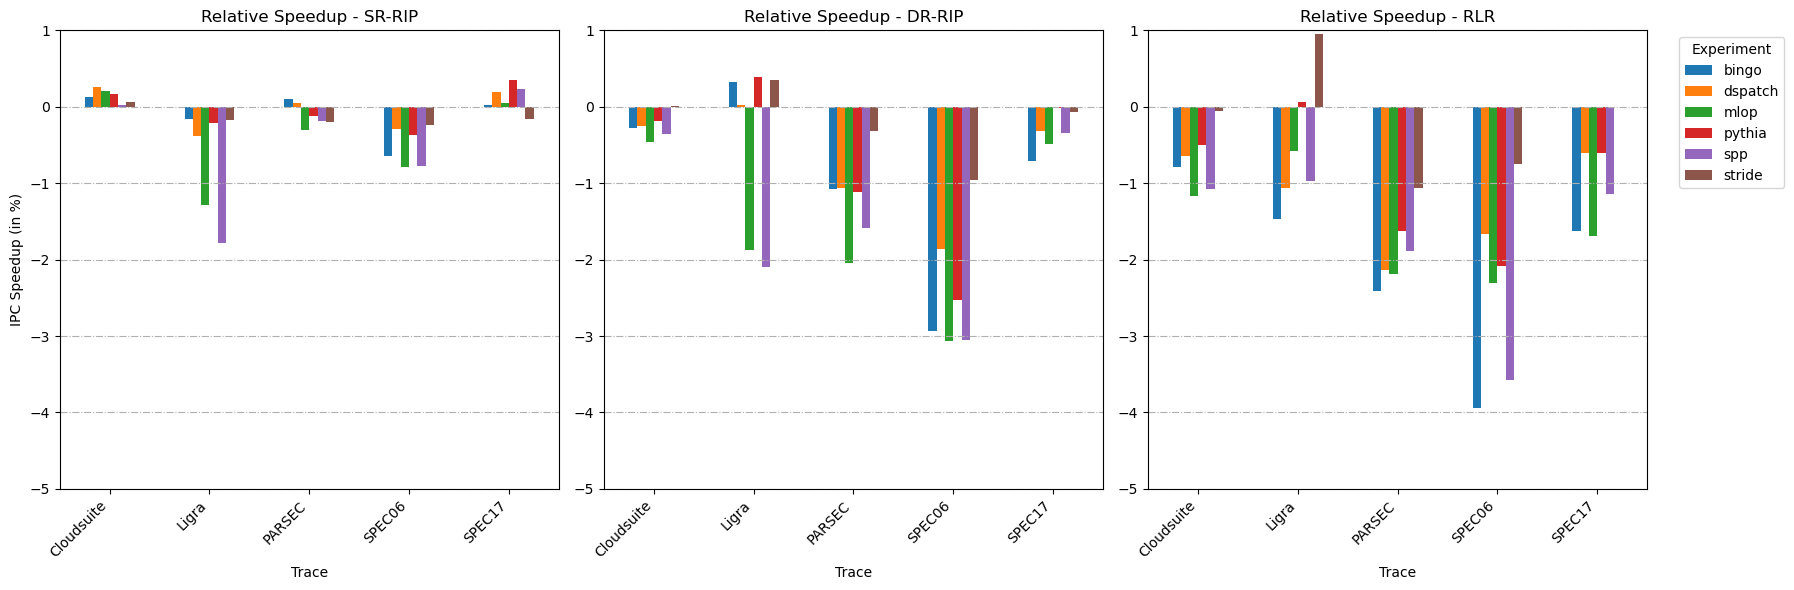

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Creating subplots with 2 rows and 1 column

# Plotting for SR-RIP
srrip_relative_pivot.plot(kind='bar', ax=axs[0])
axs[0].set_title('Relative Speedup - SR-RIP')
axs[0].set_ylabel('IPC Speedup (in %)')
axs[0].set_xticklabels(srrip_relative_pivot.index, rotation=45, ha='right')
axs[0].grid(axis='y', linestyle='-.')
axs[0].set_ylim(-5.0, 1.0)

# Move legend outside
axs[0].legend().set_visible(False)

# Plotting for DR-RIP
drrip_relative_pivot.plot(kind='bar', ax=axs[1])
axs[1].set_title('Relative Speedup - DR-RIP')
axs[1].set_xticklabels(drrip_relative_pivot.index, rotation=45, ha='right')
axs[1].grid(axis='y', linestyle='-.')
axs[1].set_ylim(-5.0, 1.0)

# Move legend outside
axs[1].legend().set_visible(False)

# Plotting for RLR
rlr_relative_pivot.plot(kind='bar', ax=axs[2])
axs[2].set_title('Relative Speedup - RLR')
axs[2].set_xticklabels(rlr_relative_pivot.index, rotation=45, ha='right')
axs[2].grid(axis='y', linestyle='-.')
axs[2].set_ylim(-5.0, 1.0)

# Move legend outside
axs[2].legend(title='Experiment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

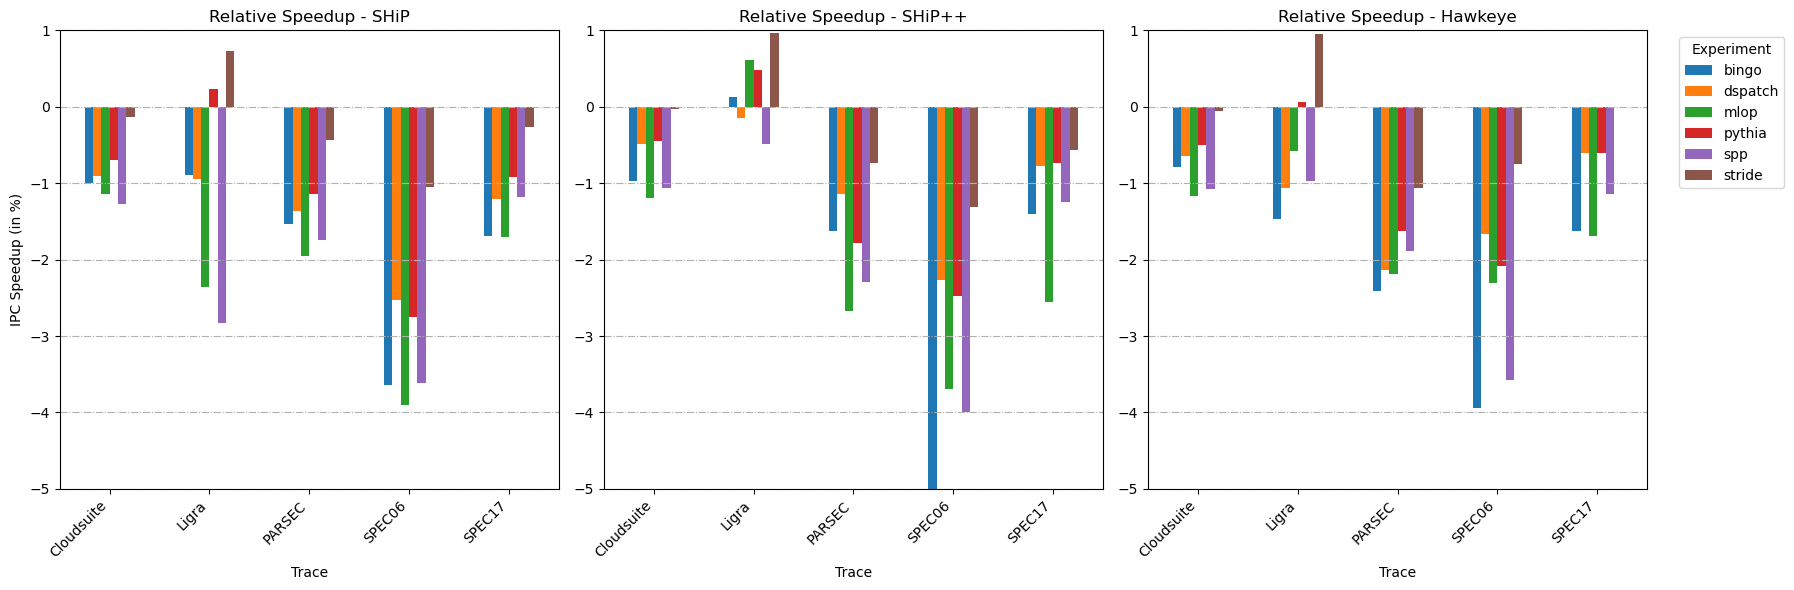

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Creating subplots with 2 rows and 1 column

# Plotting for SHiP
ship_relative_pivot.plot(kind='bar', ax=axs[0])
axs[0].set_title('Relative Speedup - SHiP')
axs[0].set_ylabel('IPC Speedup (in %)')
axs[0].set_xticklabels(ship_relative_pivot.index, rotation=45, ha='right')
axs[0].grid(axis='y', linestyle='-.')
axs[0].set_ylim(-5.0, 1.0)

# Move legend outside
axs[0].legend().set_visible(False)

# Plotting for SHiP++
ship_pp_relative_pivot.plot(kind='bar', ax=axs[1])
axs[1].set_title('Relative Speedup - SHiP++')
axs[1].set_xticklabels(ship_pp_relative_pivot.index, rotation=45, ha='right')
axs[1].grid(axis='y', linestyle='-.')
axs[1].set_ylim(-5.0, 1.0)

# Move legend outside
axs[1].legend().set_visible(False)

# Plotting for Hawkeye
hawkeye_relative_pivot.plot(kind='bar', ax=axs[2])
axs[2].set_title('Relative Speedup - Hawkeye')
axs[2].set_xticklabels(hawkeye_relative_pivot.index, rotation=45, ha='right')
axs[2].grid(axis='y', linestyle='-.')
axs[2].set_ylim(-5.0, 1.0)

axs[2].legend(title='Experiment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [13]:
# Read data from input CSV file
df_lru = pd.read_csv(output_lru)
df_srrip = pd.read_csv(output_srrip)
df_drrip = pd.read_csv(output_drrip)
df_ship = pd.read_csv(output_ship)
df_ship_pp = pd.read_csv(output_ship_pp)
df_rlr = pd.read_csv(output_rlr)
df_hawkeye = pd.read_csv(output_hawkeye)

# Concatenate the dataframes
concatenated_df = pd.concat([df_lru, df_srrip, df_drrip, df_ship, df_ship_pp, df_rlr, df_hawkeye])

concatenated_df = concatenated_df[concatenated_df['Core_0_IPC'] != 0]

concatenated_df = concatenated_df.replace(np.nan, 0)

# Write the concatenated dataframe back to a new CSV file
concatenated_df.to_csv('1C_LLC.csv', index=False)

## Correlation

In [14]:
# Read the data from CSV file
df = pd.read_csv('1C_LLC.csv')

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
df['Replacement'] = label_encoder.fit_transform(df['Replacement'])
df['Trace'] = label_encoder.fit_transform(df['Trace'])
df['Exp'] = label_encoder.fit_transform(df['Exp'])

# Calculate the correlation coefficients between Core_0_IPC and other parameters
correlation_coeff = df.corr()['Core_0_IPC'].sort_values(ascending=False)

print(correlation_coeff.to_string())


Core_0_IPC                                    1.000000
Core_0_branch_prediction_accuracy             0.389864
Core_0_average_ROB_occupancy_at_mispredict    0.357912
Trace                                         0.206079
avg_congested_cycle                           0.153929
Core_0_L1I_load_hit                           0.090307
Core_0_L1I_total_hit                          0.090307
Core_0_L1I_total_access                       0.077199
Core_0_L1I_loads                              0.077199
Core_0_L2C_average_miss_latency               0.065042
Core_0_L2C_prefetch_useful                    0.052453
Core_0_L1D_load_hit                           0.050551
Core_0_L1D_total_hit                          0.016393
Core_0_L1D_loads                              0.009557
Replacement                                   0.001180
Exp                                          -0.011166
Core_0_L1D_total_access                      -0.019139
Core_0_L2C_prefetch_late                     -0.028637
Core_0_L2C

In [15]:
# Read the data from CSV file
df_lru = pd.read_csv(output_lru)

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
df_lru['Replacement'] = label_encoder.fit_transform(df_lru['Replacement'])
df_lru['Trace'] = label_encoder.fit_transform(df_lru['Trace'])
df_lru['Exp'] = label_encoder.fit_transform(df_lru['Exp'])

# Calculate the correlation coefficients between Core_0_IPC and other parameters
lru_correlation_coeff = df_lru.corr()['Core_0_IPC'].sort_values(ascending=False)

print(lru_correlation_coeff.to_string())

Core_0_IPC                                    1.000000
Core_0_branch_prediction_accuracy             0.388417
Core_0_average_ROB_occupancy_at_mispredict    0.359191
Core_0_L1I_average_miss_latency               0.314665
Trace                                         0.202604
avg_congested_cycle                           0.147311
Core_0_L1I_total_hit                          0.085006
Core_0_L1I_load_hit                           0.085006
Core_0_L1I_total_access                       0.071952
Core_0_L1I_loads                              0.071952
Core_0_L2C_average_miss_latency               0.068751
Core_0_L1D_load_hit                           0.048839
Core_0_L2C_prefetch_useful                    0.048679
Core_0_L1D_total_hit                          0.015933
Core_0_L1D_loads                              0.007620
Exp                                          -0.013055
Core_0_L1D_total_access                      -0.019596
Core_0_L2C_prefetch_late                     -0.028292
Core_0_L2C

In [16]:
# Read the data from CSV file
df_srrip = pd.read_csv(output_srrip)

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
df_srrip['Replacement'] = label_encoder.fit_transform(df_srrip['Replacement'])
df_srrip['Trace'] = label_encoder.fit_transform(df_srrip['Trace'])
df_srrip['Exp'] = label_encoder.fit_transform(df_srrip['Exp'])

# Calculate the correlation coefficients between Core_0_IPC and other parameters
srrip_correlation_coeff = df_srrip.corr()['Core_0_IPC'].sort_values(ascending=False)

print(srrip_correlation_coeff.to_string())

Core_0_IPC                                    1.000000
Core_0_branch_prediction_accuracy             0.387919
Core_0_L1I_average_miss_latency               0.357977
Core_0_average_ROB_occupancy_at_mispredict    0.356498
Trace                                         0.202365
avg_congested_cycle                           0.149228
Core_0_L1I_total_hit                          0.085105
Core_0_L1I_load_hit                           0.085105
Core_0_L1I_total_access                       0.072027
Core_0_L1I_loads                              0.072027
Core_0_L2C_average_miss_latency               0.055925
Core_0_L2C_prefetch_useful                    0.049579
Core_0_L1D_load_hit                           0.048198
Core_0_L1D_total_hit                          0.015011
Core_0_L1D_loads                              0.007167
Exp                                          -0.013669
Core_0_L1D_total_access                      -0.020660
Core_0_L2C_prefetch_late                     -0.029572
Core_0_L2C

In [17]:
# Read the data from CSV file
df_drrip = pd.read_csv(output_drrip)

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
df_drrip['Replacement'] = label_encoder.fit_transform(df_drrip['Replacement'])
df_drrip['Trace'] = label_encoder.fit_transform(df_drrip['Trace'])
df_drrip['Exp'] = label_encoder.fit_transform(df_drrip['Exp'])

# Calculate the correlation coefficients between Core_0_IPC and other parameters
drrip_correlation_coeff = df_drrip.corr()['Core_0_IPC'].sort_values(ascending=False)

print(drrip_correlation_coeff.to_string())

Core_0_IPC                                    1.000000
Core_0_branch_prediction_accuracy             0.388553
Core_0_L1I_average_miss_latency               0.379102
Core_0_average_ROB_occupancy_at_mispredict    0.357309
Trace                                         0.205890
avg_congested_cycle                           0.131275
Core_0_L1I_total_hit                          0.089373
Core_0_L1I_load_hit                           0.089373
Core_0_L1I_total_access                       0.076264
Core_0_L1I_loads                              0.076264
Core_0_L2C_average_miss_latency               0.065149
Core_0_L2C_prefetch_useful                    0.051781
Core_0_L1D_load_hit                           0.049930
Core_0_L1D_total_hit                          0.015608
Core_0_L1D_loads                              0.008856
Exp                                          -0.012756
Core_0_L1D_total_access                      -0.020001
Core_0_L2C_prefetch_late                     -0.030004
Core_0_L2C

In [18]:
# Load the data
data = pd.read_csv('1C_LLC.csv')

# Select features and target
X = data.drop(['Replacement', 'Trace', 'Exp', 'Filter', 'Core_0_IPC'], axis=1)  # Features
y = data['Core_0_IPC']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Print the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients:")
print(coefficients.to_string())

Mean Squared Error: 0.046690128765557545
R-squared: 0.689056836861786

Coefficients:
                                             Coefficient
Core_0_branch_prediction_accuracy          -3.545921e-03
Core_0_branch_MPKI                         -3.351965e-03
Core_0_average_ROB_occupancy_at_mispredict  9.897653e-04
Core_0_L1D_total_access                    -2.107259e-08
Core_0_L1D_total_hit                        2.124062e-08
Core_0_L1D_total_miss                      -4.228131e-08
Core_0_L1D_loads                           -1.212989e-08
Core_0_L1D_load_hit                         1.083227e-08
Core_0_L1D_load_miss                       -2.296947e-08
Core_0_L1D_average_miss_latency            -1.975286e-03
Core_0_L1I_total_access                    -2.117405e-08
Core_0_L1I_total_hit                        2.228280e-08
Core_0_L1I_total_miss                      -4.345019e-08
Core_0_L1I_loads                           -2.117544e-08
Core_0_L1I_load_hit                         2.228297e-08
Cor

In [19]:
# Read the data from 'mega_file.csv'
data = pd.read_csv('1C_LLC.csv')

# Select features and target variable
X = data.drop(columns=['Replacement', 'Trace', 'Exp', 'Core_0_IPC', 'Filter'])  # Exclude non-numeric and target columns
y = data['Core_0_IPC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso regression model
lasso = Lasso(alpha=0.01)  # Adjust alpha for more or less regularization
lasso.fit(X_train_scaled, y_train)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display the most influential parameters
print("Most influential parameters affecting Core-0_IPC:")
print(feature_importance.to_string())

Most influential parameters affecting Core-0_IPC:
                                       Feature  Coefficient
36             Core_0_L2C_average_miss_latency     0.161332
2   Core_0_average_ROB_occupancy_at_mispredict     0.035300
0            Core_0_branch_prediction_accuracy     0.006399
30                 Core_0_L2C_prefetch_dropped     0.005931
47                     Core_0_LLC_prefetch_hit     0.004890
60                         avg_congested_cycle     0.004374
46                       Core_0_LLC_prefetches     0.000000
34                 Core_0_L2C_prefetch_useless    -0.000000
35                    Core_0_L2C_prefetch_late    -0.000000
64                             DRAM_bw_level_2    -0.000000
37                     Core_0_LLC_total_access     0.000000
38                        Core_0_LLC_total_hit     0.000000
39                       Core_0_LLC_total_miss    -0.000000
40                            Core_0_LLC_loads     0.000000
41                         Core_0_LLC_load_hit    

In [20]:
# Load the CSV file into a DataFrame
data = pd.read_csv("1C_LLC.csv")

# Separate features (X) and target variable (y) if applicable
X = data.drop(columns=["Replacement", "Trace", "Exp", "Filter"])  # Exclude non-numeric columns
# Assuming you have a target variable 'target_variable'
# y = data["target_variable"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=5)  # Reduce to 5 components
X_pca = pca.fit_transform(X_scaled)

# Get the most important columns
important_columns = pd.DataFrame(pca.components_, columns=X.columns).abs().sum(axis=0).nlargest(5).index.tolist()

# Extract the most important columns
reduced_data = data[important_columns]

# Save the reduced dataset to a new CSV file
reduced_data.to_csv("reduced_data.csv", index=False)

# Print the names of the most important columns
print("The most important features after dimensionality reduction:")
print(important_columns)

The most important features after dimensionality reduction:
['DRAM_bw_level_0', 'Core_0_L2C_prefetch_filled', 'Core_0_L1D_loads', 'Core_0_L2C_prefetch_useless', 'Core_0_LLC_loads']
